# Anomaly Detection using pyOD

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/Anomaly_with_pyOD.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd

# Load the dataset to understand its structure
file_path = '/content/gdrive/MyDrive/DataMining/Month_Value_1.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


The dataset contains the following columns:

* Period: Represents the date or time period.
* Revenue: The revenue generated in the respective period.
* Sales_quantity: The quantity of sales in the period.
* Average_cost: The average cost per unit in the period.
* The_average_annual_payroll_of_the_region: This seems to represent some form of regional payroll metric.

In [3]:
# Checking the basic characteristics of the dataset
dataset_info = {
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

dataset_info



{'Shape': (96, 5),
 'Data Types': Period                                       object
 Revenue                                     float64
 Sales_quantity                              float64
 Average_cost                                float64
 The_average_annual_payroll_of_the_region    float64
 dtype: object,
 'Missing Values': Period                                       0
 Revenue                                     32
 Sales_quantity                              32
 Average_cost                                32
 The_average_annual_payroll_of_the_region    32
 dtype: int64}

The dataset consists of 96 rows and 5 columns. Here are some key observations:

The "Period" column is of object type, which usually indicates string data, likely representing dates in this context.

The other columns are of float64 type, indicating numerical data.
There are 32 missing values in each of the columns "Revenue", "Sales_quantity", "Average_cost", and "The_average_annual_payroll_of_the_region".

In [4]:
from pandas.api.types import is_numeric_dtype

# Converting 'Period' to datetime format
data['Period'] = pd.to_datetime(data['Period'], format="%d.%m.%Y")

# Handling missing values
# For numerical columns, we'll impute missing values with the median
for column in data.columns:
    if is_numeric_dtype(data[column]):
        median = data[column].median()
        data[column].fillna(median, inplace=True)

# Rechecking for missing values
missing_values_after_imputation = data.isnull().sum()

# Displaying the modified dataset and the recheck for missing values
modified_dataset_head = data.head()
missing_values_after_imputation, modified_dataset_head



(Period                                      0
 Revenue                                     0
 Sales_quantity                              0
 Average_cost                                0
 The_average_annual_payroll_of_the_region    0
 dtype: int64,
       Period       Revenue  Sales_quantity  Average_cost  \
 0 2015-01-01  1.601007e+07         12729.0   1257.763541   
 1 2015-02-01  1.580759e+07         11636.0   1358.507000   
 2 2015-03-01  2.204715e+07         15922.0   1384.697024   
 3 2015-04-01  1.881458e+07         15227.0   1235.606705   
 4 2015-05-01  1.402148e+07          8620.0   1626.621765   
 
    The_average_annual_payroll_of_the_region  
 0                                30024676.0  
 1                                30024676.0  
 2                                30024676.0  
 3                                30024676.0  
 4                                30024676.0  )

The "Period" column has been successfully converted to datetime format, and the missing values in the numerical columns have been imputed using the median of each column. There are now no missing values in the dataset.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Summary
statistical_summary = data.describe()
statistical_summary



,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,9.600000e+01,96.000000,96.000000,9.600000e+01
mean,3.227059e+07,18920.916667,1681.507372,2.852650e+07
std,9.481058e+06,5381.951977,242.500825,8.920511e+05
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.853894e+07,16702.750000,1605.548321,2.810553e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.587175e+07,20525.250000,1759.132711,2.925338e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


Statistical Summary
* Revenue: Varies significantly, with a mean of approximately 32.27 million and a standard deviation of about 9.48 million.
* Sales Quantity: Also shows considerable variability, averaging around 18,921 units with a standard deviation of 5,382.
* Average Cost: More stable in comparison, with a mean of 1,681 and a standard deviation of 242.
* The Average Annual Payroll of the Region: Shows less variation compared to other metrics.

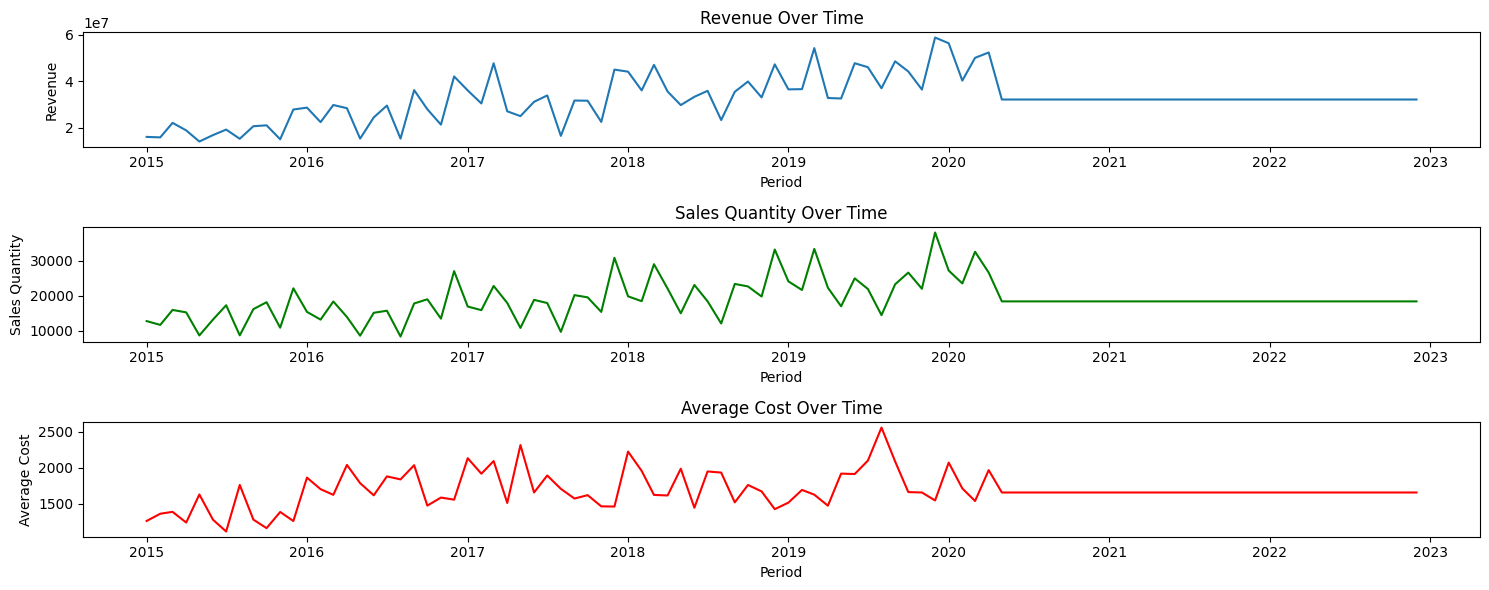

In [7]:
# Data Visualization
# Plotting time series trends for 'Revenue', 'Sales_quantity', and 'Average_cost'
plt.figure(figsize=(15, 6))

plt.subplot(3, 1, 1)
plt.plot(data['Period'], data['Revenue'], label='Revenue')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')

plt.subplot(3, 1, 2)
plt.plot(data['Period'], data['Sales_quantity'], label='Sales Quantity', color='green')
plt.xlabel('Period')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Over Time')

plt.subplot(3, 1, 3)
plt.plot(data['Period'], data['Average_cost'], label='Average Cost', color='red')
plt.xlabel('Period')
plt.ylabel('Average Cost')
plt.title('Average Cost Over Time')

plt.tight_layout()
plt.show()



<ipython-input-8-000172545178>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


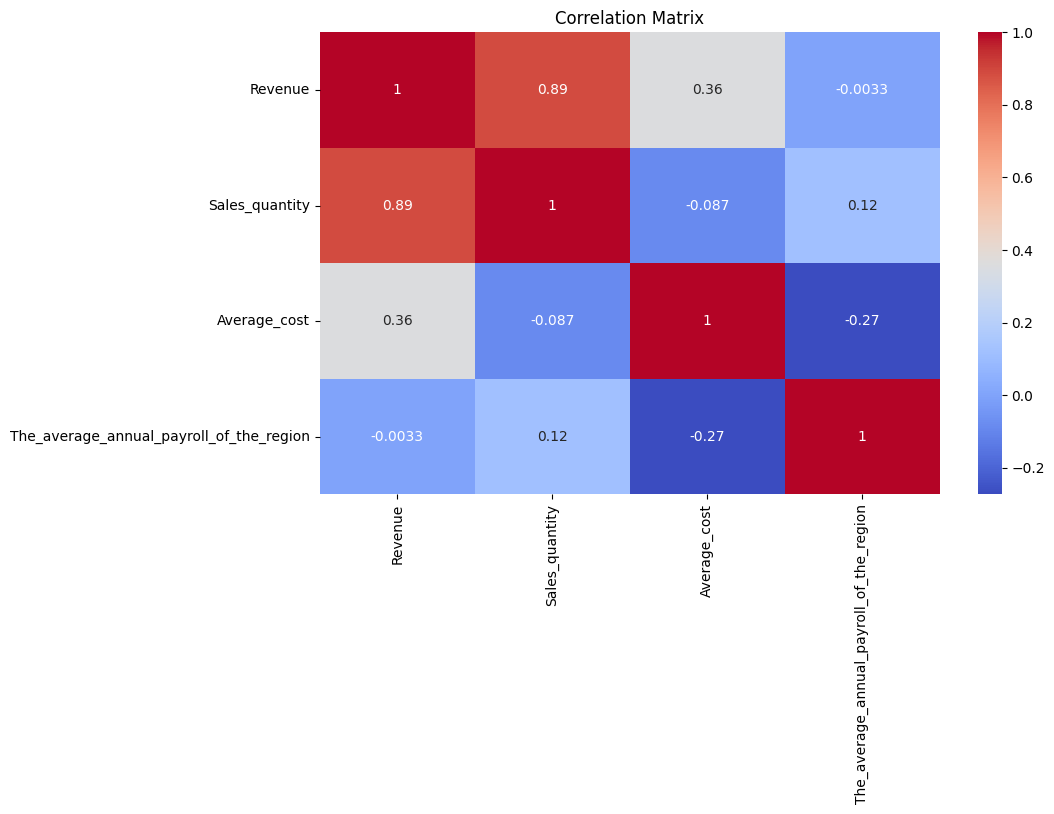

In [8]:
# Correlation Matrix Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Visualizations
* Revenue Over Time: Shows fluctuating trends, which might be seasonal or related to specific business activities.
* Sales Quantity Over Time: Also fluctuates, possibly in correlation with revenue.
* Average Cost Over Time: Appears relatively stable with some variations.
* Correlation Matrix: Provides insights into how these variables are related to each other. For instance, a strong correlation between revenue and sales quantity is observable.

In [9]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=c65f5717094fc4bbd44ec9bcdd9d5642525ec76396be43cc035a00bbe506dabf
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [25]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data excluding the 'Period' column
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Period', axis=1))

In [26]:
from pyod.models.iforest import IForest
# Initialize the Isolation Forest model
iforest = IForest()

# Fit the model
iforest.fit(scaled_features)

# Get the prediction labels (0: normal, 1: outlier)
outliers = iforest.labels_

# Add the outlier predictions to the original dataframe
data['Outlier'] = outliers


In [27]:
# Count of detected outliers
outlier_count = sum(outliers)

# Display some of the data
print(data.head())
print("Number of outliers detected:", outlier_count)


      Period       Revenue  Sales_quantity  Average_cost  \
0 2015-01-01  1.601007e+07         12729.0   1257.763541   
1 2015-02-01  1.580759e+07         11636.0   1358.507000   
2 2015-03-01  2.204715e+07         15922.0   1384.697024   
3 2015-04-01  1.881458e+07         15227.0   1235.606705   
4 2015-05-01  1.402148e+07          8620.0   1626.621765   

   The_average_annual_payroll_of_the_region  Outlier  
0                                30024676.0        0  
1                                30024676.0        0  
2                                30024676.0        0  
3                                30024676.0        0  
4                                30024676.0        0  
Number of outliers detected: 10


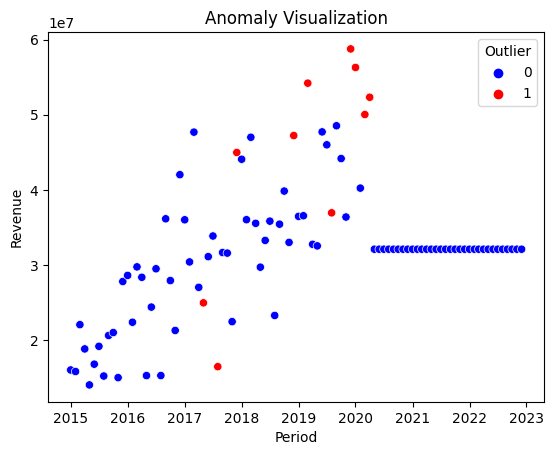

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Period', y='Revenue', hue='Outlier', data=data, palette=['blue', 'red'])
plt.title('Anomaly Visualization')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.show()


In [31]:
data.drop('Outlier', axis=1)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-08-01,3.209088e+07,18368.0,1654.399798,28197847.0
92,2022-09-01,3.209088e+07,18368.0,1654.399798,28197847.0
93,2022-10-01,3.209088e+07,18368.0,1654.399798,28197847.0
94,2022-11-01,3.209088e+07,18368.0,1654.399798,28197847.0


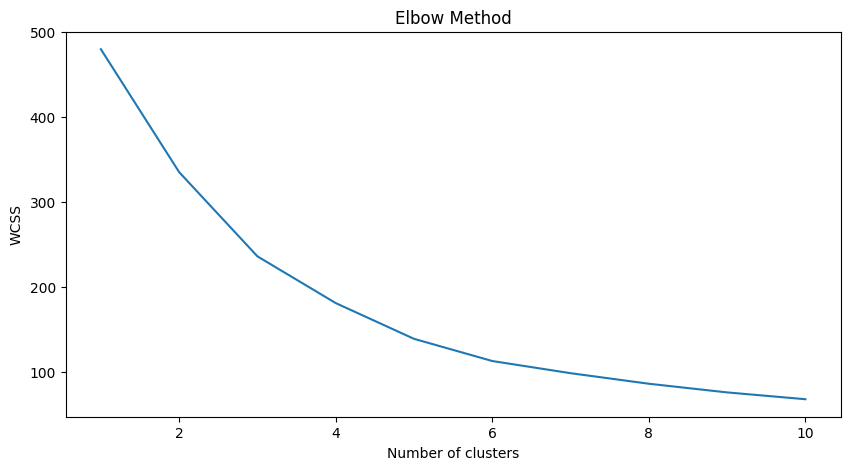

In [32]:
from sklearn.cluster import KMeans
# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


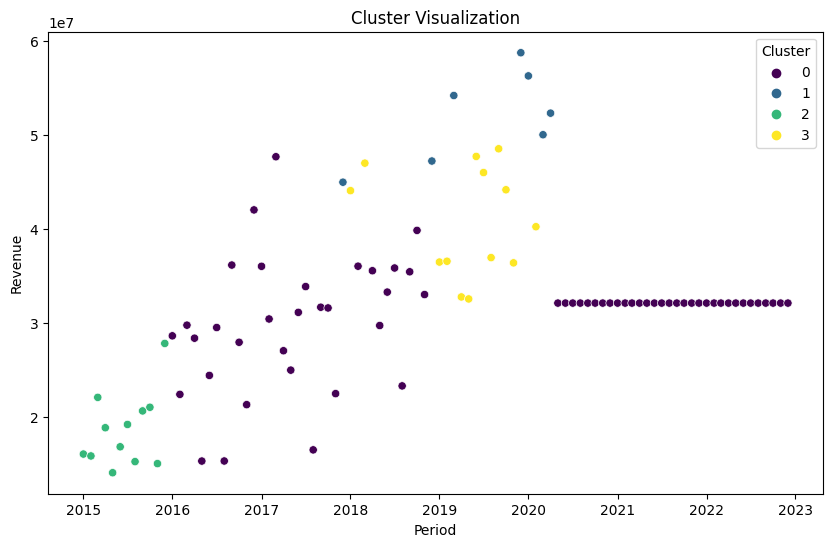

In [38]:
# Choosing the number of clusters based on the Elbow plot and applying K-Means Clustering
num_clusters = 4 # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster information to the original dataframe
data['Cluster'] = clusters

# Visualization of clusters
# Replace 'Feature1' and 'Feature2' with actual feature column names for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Period', y='Revenue', hue='Cluster', data=data, palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.show()